<a href="https://colab.research.google.com/github/Shisiajoy/PYTHON-DATA-ANALYSIS/blob/main/Music_and_Mental_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MUSIC AND MENTAL HEALTH**

This notebook explores the relationship between music and mental health.

In [1]:
%ls

mxmh_survey_results.csv  sample_data/


In [2]:
import pandas as pd

In [3]:
url = "/content/mxmh_survey_results.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

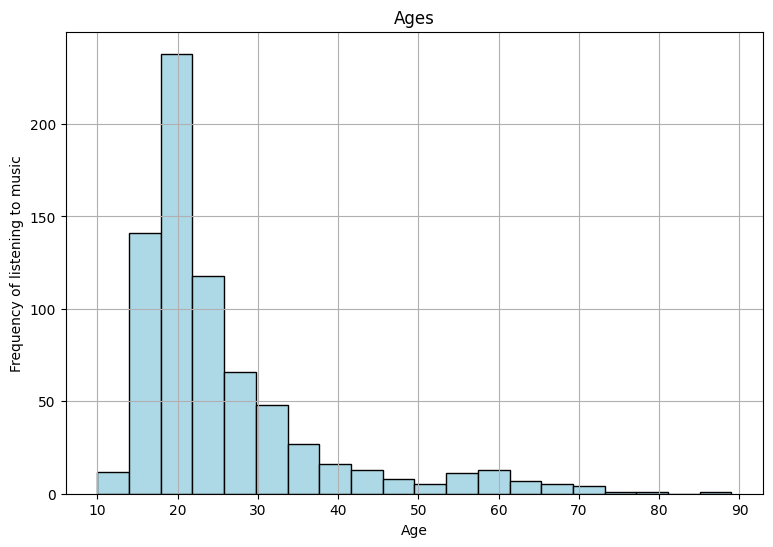

In [6]:
import matplotlib.pyplot as plt

# Extract the 'age' column from your DataFrame
ages = df['Age']

# Plot the histogram
plt.figure(figsize=(9, 6))
plt.hist(ages, bins=20, color='lightblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Ages')
plt.xlabel('Age')
plt.ylabel('Frequency of listening to music')
plt.grid(True)
plt.show()


In [7]:
#ages whose count is greater than 50

df['Age'].value_counts().loc[lambda x : x>50]


Age
18.0    85
19.0    61
17.0    59
21.0    52
Name: count, dtype: int64

In [8]:

df['Age'].max()

89.0

Most respondents are in their late teens or early twenties.

The age distribution makes sense, as the survey used to collect data was advertised in discussion forums and social media sites. This may introduce age bias, i.e. influencing which music genres are most popular.

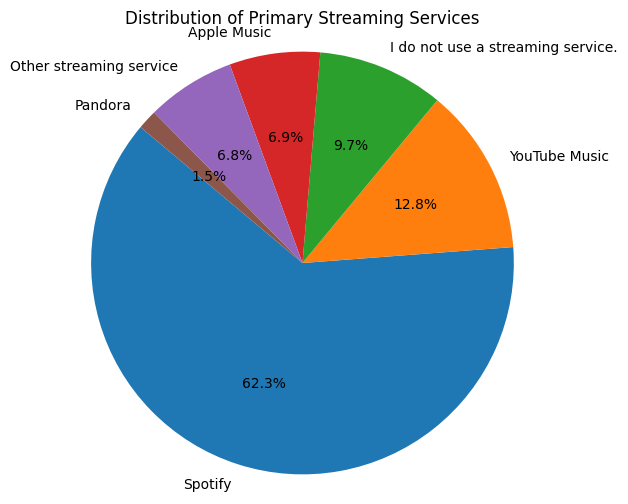

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'Primary streaming service' column
streaming_service_usage = df['Primary streaming service']

# Calculate value counts to determine popularity
service_popularity = streaming_service_usage.value_counts()

# Plot the popularity of streaming services as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(service_popularity, labels=service_popularity.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Primary Streaming Services')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [10]:
df['Primary streaming service'].value_counts(normalize=True)

Primary streaming service
Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: proportion, dtype: float64

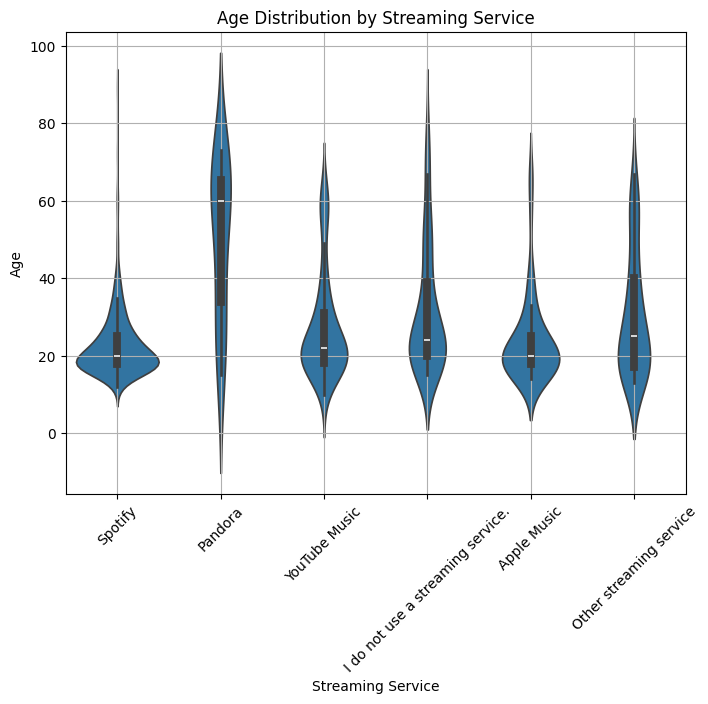

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.violinplot(x='Primary streaming service', y='Age', data=df, inner='box')
plt.title('Age Distribution by Streaming Service')
plt.xlabel('Streaming Service')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [13]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music                          20.0
 I do not use a streaming service.    24.0
 Other streaming service              25.0
 Pandora                              60.0
 Spotify                              20.0
 YouTube Music                        22.0
 Name: Age, dtype: float64]

Spotify is the most popular music streaming service, accounting for 62% of all respondents. Spotify, along with Apple Music, also has a marginally younger userbase than other streaming platforms. Pandora has the oldest user base by far, with the median user age at ~60 years old.

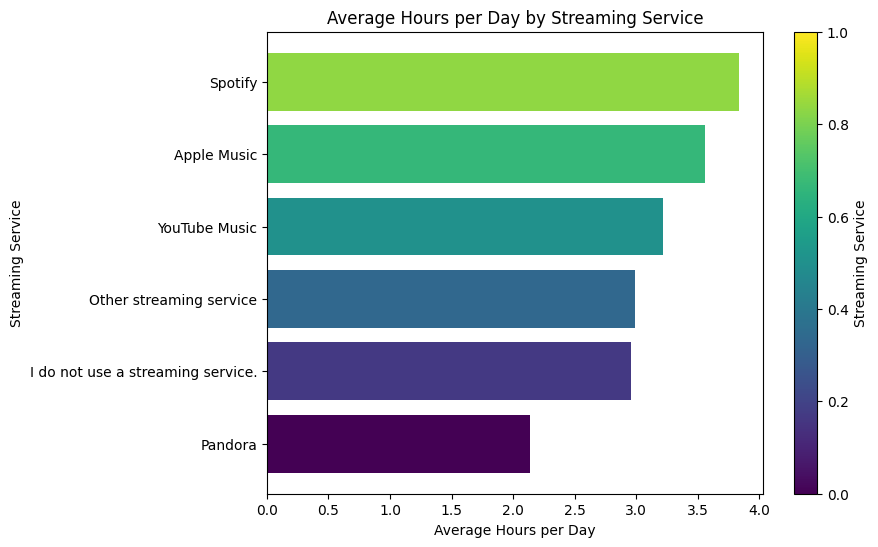

In [14]:

import matplotlib.pyplot as plt
import numpy as np



# Define colors for gradient fill
colors = plt.cm.viridis(np.linspace(0, 1, len(df['Primary streaming service'].unique())))

# Create the horizontal bar plot with gradient fill
plt.figure(figsize=(8, 6))

# Grouping data by streaming service and calculating mean hours per day
grouped_data = df.groupby('Primary streaming service')['Hours per day'].mean().sort_values()

bars = plt.barh(range(len(grouped_data)), grouped_data.values, color=colors)

# Set y-tick labels
plt.yticks(range(len(grouped_data)), grouped_data.index)

# Add a color bar to indicate the gradient
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca())
cb.set_label('Streaming Service')

plt.title('Average Hours per Day by Streaming Service')
plt.xlabel('Average Hours per Day')
plt.ylabel('Streaming Service')
plt.show()


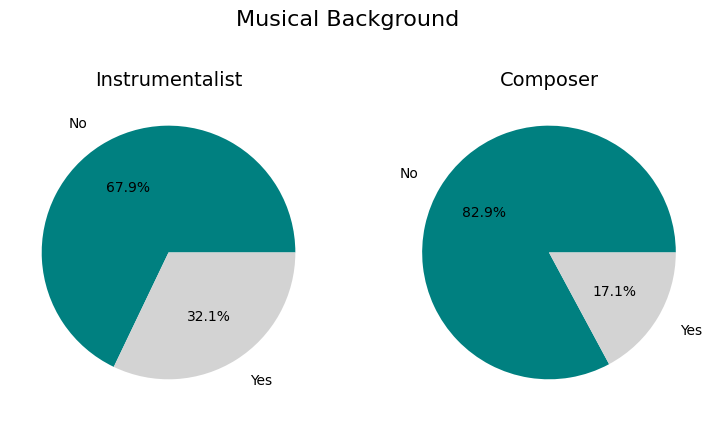

In [16]:
fig = plt.figure(figsize=(9, 5))

plt.suptitle("Musical Background", fontsize=16)

ax1 = fig.add_subplot(121)
inst = df['Instrumentalist'].value_counts()
labels_inst = inst.index
colors_inst = ['teal', 'lightgrey']  # Changed colors
inst.plot(kind='pie', colors=colors_inst, labeldistance=1.2, labels=labels_inst, autopct='%1.1f%%', ax=ax1)
ax1.set_title('Instrumentalist', fontsize=14)  # Added title with fontsize
ax1.set_ylabel('')  # Removed y-label

ax2 = fig.add_subplot(122)
comp = df['Composer'].value_counts()
labels_comp = comp.index
colors_comp = ['teal', 'lightgrey']  # Changed colors
comp.plot(kind='pie', colors=colors_comp, labeldistance=1.2, labels=labels_comp, autopct='%1.1f%%', ax=ax2)
ax2.set_title('Composer', fontsize=14)  # Added title with fontsize
ax2.set_ylabel('')  # Removed y-label

plt.show()


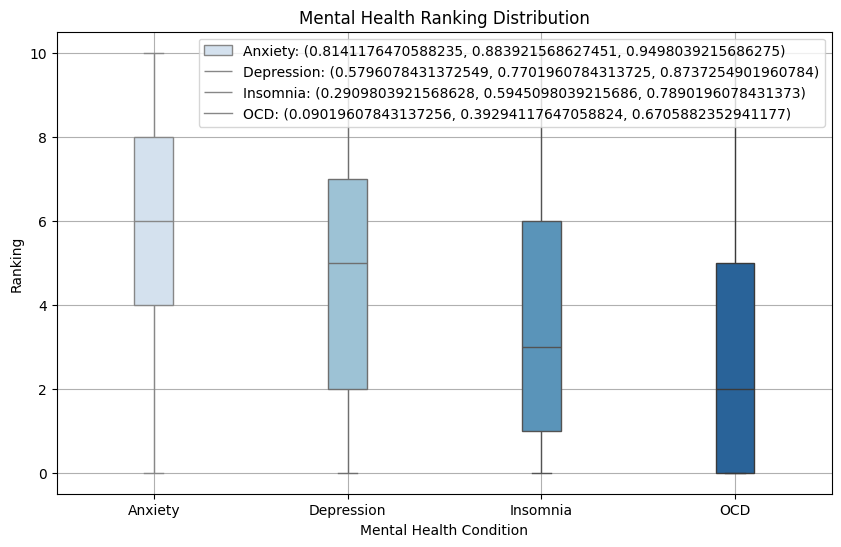

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of columns for the box plot
columns_order = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Subset the DataFrame to include only the mental health ranking columns
mental_health_df = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']]

# Melt the DataFrame to long format for box plot
mental_health_df_melted = mental_health_df.melt(var_name='Mental Health Condition', value_name='Ranking')

# Create a color palette for gradient fill
colors = sns.color_palette("Blues", n_colors=len(columns_order))

# Create the side-by-side box plot using seaborn
plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_order):
    sns.boxplot(x='Mental Health Condition', y='Ranking', data=mental_health_df_melted[mental_health_df_melted['Mental Health Condition'] == column], color=colors[i], width=0.2, fliersize=0)

# Add legend for the colors
legend_labels = [f'{column}: {color}' for column, color in zip(columns_order, colors)]
plt.legend(legend_labels, loc='upper right')

plt.title('Mental Health Ranking Distribution')
plt.xlabel('Mental Health Condition')
plt.ylabel('Ranking')
plt.grid(True)
plt.show()


In [18]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


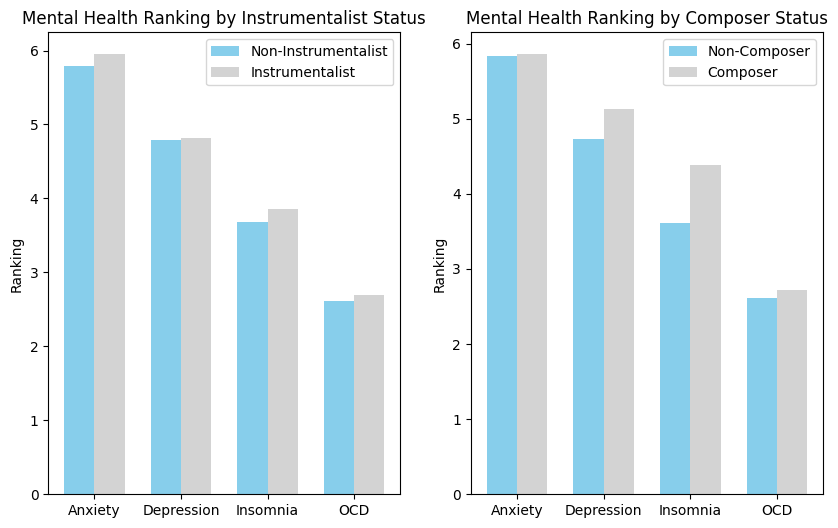

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the labels for the mental health conditions
labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


instrumentalist_data = df.loc[df['Instrumentalist'] == 'Yes', ['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().values
non_instrumentalist_data = df.loc[df['Instrumentalist'] == 'No', ['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().values
composer_data = df.loc[df['Composer'] == 'Yes', ['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().values
non_composer_data = df.loc[df['Composer'] == 'No', ['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().values

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot bars for instrumentalists on the first subplot
bars1 = ax1.bar(x - width/2, non_instrumentalist_data, width, label='Non-Instrumentalist', color='skyblue')
bars2 = ax1.bar(x + width/2, instrumentalist_data, width, label='Instrumentalist', color='lightgrey')
ax1.set_ylabel('Ranking')
ax1.set_title('Mental Health Ranking by Instrumentalist Status')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

# Plot bars for composers on the second subplot
bars3 = ax2.bar(x - width/2, non_composer_data, width, label='Non-Composer', color='skyblue')
bars4 = ax2.bar(x + width/2, composer_data, width, label='Composer', color='lightgrey')
ax2.set_ylabel('Ranking')
ax2.set_title('Mental Health Ranking by Composer Status')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

plt.show()


<ipython-input-20-da18da15ca11>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hours per day', y='Primary streaming service', data=df, ci=None, palette=colors, orient='h')
<ipython-input-20-da18da15ca11>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hours per day', y='Primary streaming service', data=df, ci=None, palette=colors, orient='h')
<ipython-input-20-da18da15ca11>:14: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.barplot(x='Hours per day', y='Primary streaming service', data=df, ci=None, palette=colors, orient='h')


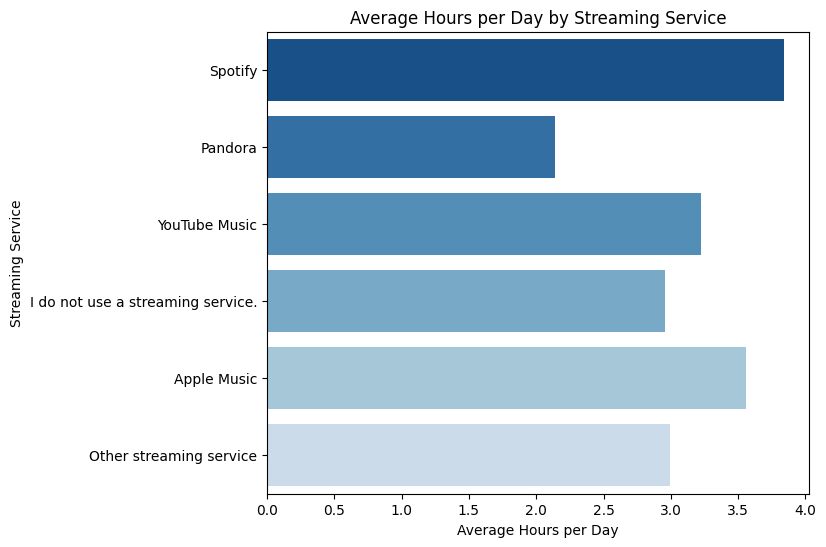

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a blue color palette for gradient fill
colors = sns.color_palette("Blues", n_colors=len(df['Primary streaming service'].unique()))

# Reverse the order of colors
colors.reverse()

# Set figure size
plt.figure(figsize=(7, 6))

# Plot the horizontal bar plot with gradient fill
sns.barplot(x='Hours per day', y='Primary streaming service', data=df, ci=None, palette=colors, orient='h')

plt.title('Average Hours per Day by Streaming Service')
plt.xlabel('Average Hours per Day')
plt.ylabel('Streaming Service')
plt.show()


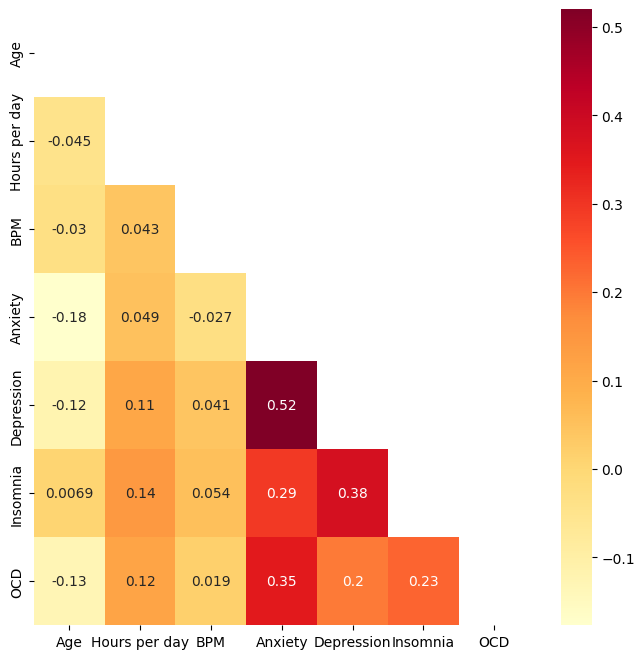

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_m = numeric_columns.corr()

# Plot heatmap
mask = np.triu(corr_m)
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap
sns.heatmap(corr_m, annot=True, mask=mask, cmap='YlOrRd', annot_kws={"size": 10})  # Adjust the size of annotations
plt.show()


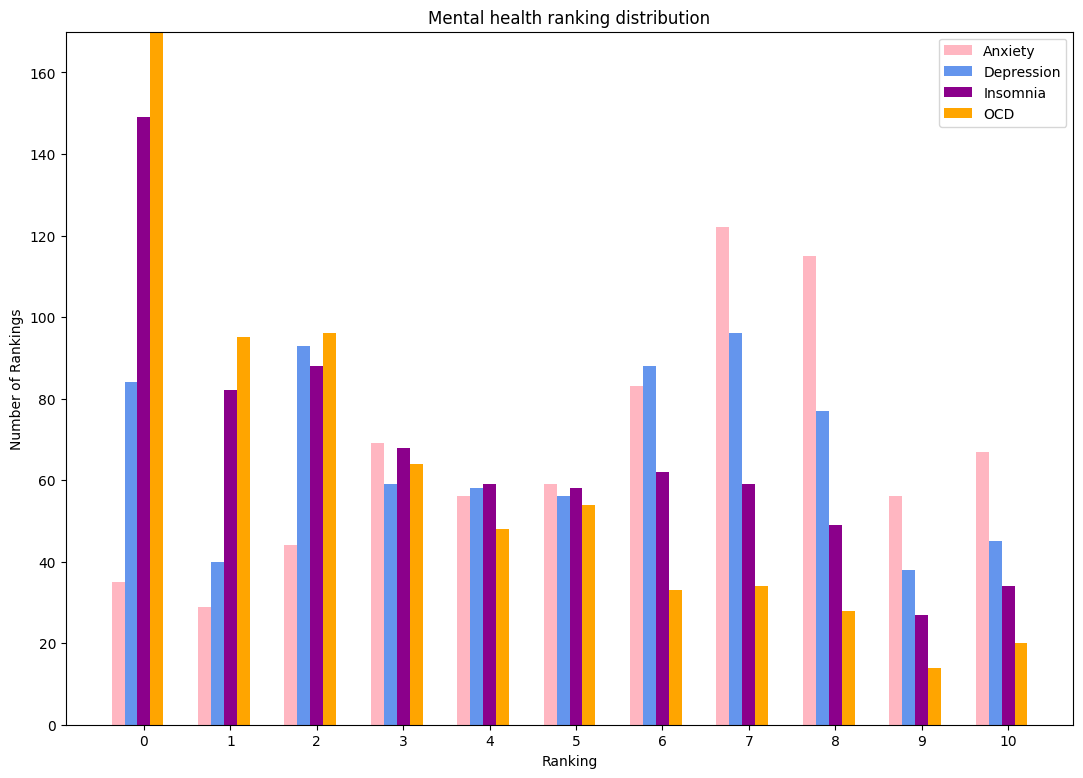

In [22]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

**MENTAL HEALTH**

**LISTENING TIME AND MENTAL HEALTH**

In [23]:
# Calculate the maximum value among extreme_means and low_means
max_hours = max(max(extreme_means), max(low_means))

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(5, 5))  # 2 rows, 1 column

# Plot extreme mental health rankings
axes[0].bar(m_all, extreme_means, width=0.5, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
axes[0].set_ylabel("Average Hours Listened")
axes[0].set_title("Hours Listened for Individuals with Extreme Mental Health Rankings")
axes[0].set_ylim(0, max_hours)  # Set the same y-axis limits
axes[0].grid(axis='y')

# Plot low mental health rankings
axes[1].bar(m_all_low, low_means, width=0.5, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
axes[1].set_ylabel("Average Hours Listened")
axes[1].set_title("Hours Listened for Individuals with Low Mental Health Rankings")
axes[1].set_ylim(0, max_hours)  # Set the same y-axis limits
axes[1].grid(axis='y')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


NameError: name 'extreme_means' is not defined

**EFFECTS OF MUSIC ON MENTAL HEALTH**

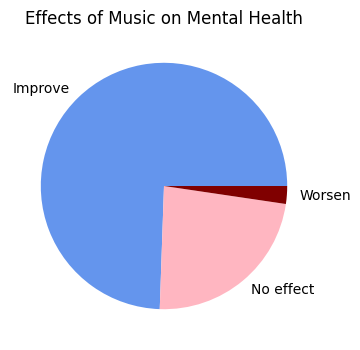

In [24]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["cornflowerblue", "lightpink", "maroon"], ylabel= '');

**MUSIC GENRE**

<ipython-input-25-3bc539cd1c4b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='pastel')


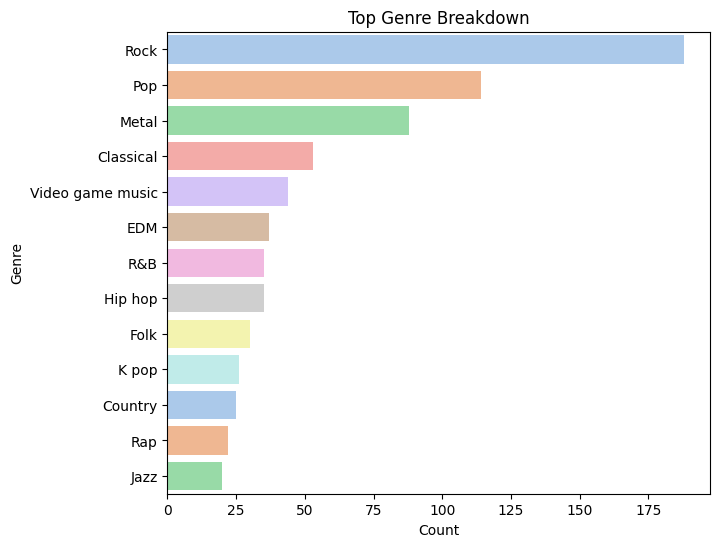

In [25]:

import seaborn as sns

# Filter the top genres with counts greater than 10
genre_counts = df["Fav genre"].value_counts().loc[lambda x: x > 10]

# Create a DataFrame from the filtered genre counts
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Plot the side bar plot with a less colorful palette
plt.figure(figsize=(7, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette='pastel')

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top Genre Breakdown")
plt.show()


<ipython-input-26-8258b9de3b3b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=composer_counts.index, y=composer_counts.values, palette='viridis', ax=ax1, saturation=0.7)
<ipython-input-26-8258b9de3b3b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=instrumentalist_counts.index, y=instrumentalist_counts.values, palette='magma', ax=ax2, saturation=0.7)


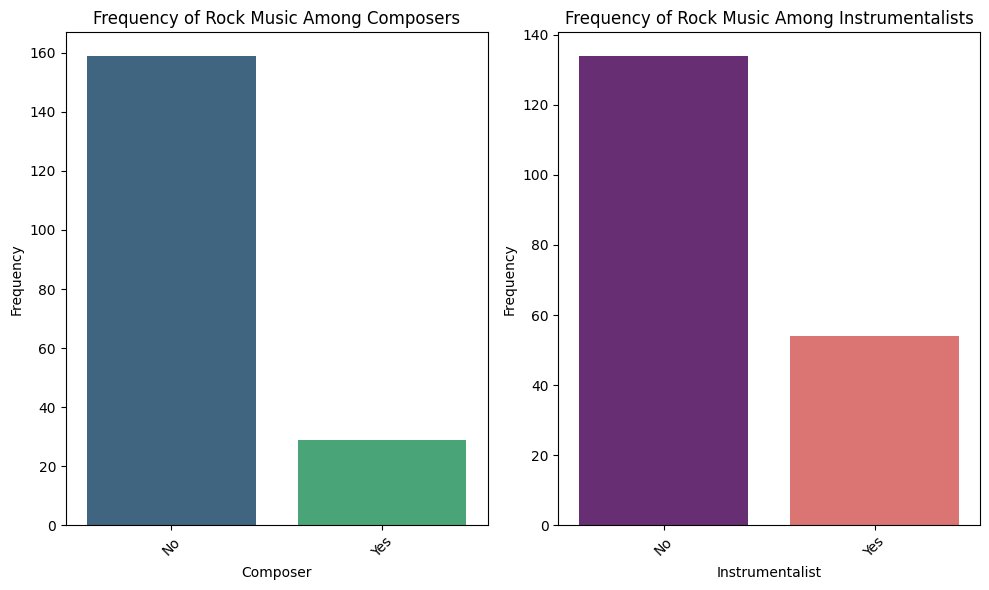

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for rows where rock music is favored
rock_music_df = df[df['Fav genre'] == 'Rock']

# Count the frequency of composers and instrumentalists in the filtered data
composer_counts = rock_music_df['Composer'].value_counts()
instrumentalist_counts = rock_music_df['Instrumentalist'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot for composers
sns.barplot(x=composer_counts.index, y=composer_counts.values, palette='viridis', ax=ax1, saturation=0.7)
ax1.set_title('Frequency of Rock Music Among Composers')
ax1.set_xlabel('Composer')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)

# Plot for instrumentalists
sns.barplot(x=instrumentalist_counts.index, y=instrumentalist_counts.values, palette='magma', ax=ax2, saturation=0.7)
ax2.set_title('Frequency of Rock Music Among Instrumentalists')
ax2.set_xlabel('Instrumentalist')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**AGE AND GENRE**

<ipython-input-27-0a2921578fa9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette=custom_palette)
<ipython-input-27-0a2921578fa9>:15: UserWarning: 
The palette list has fewer values (5) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette=custom_palette)


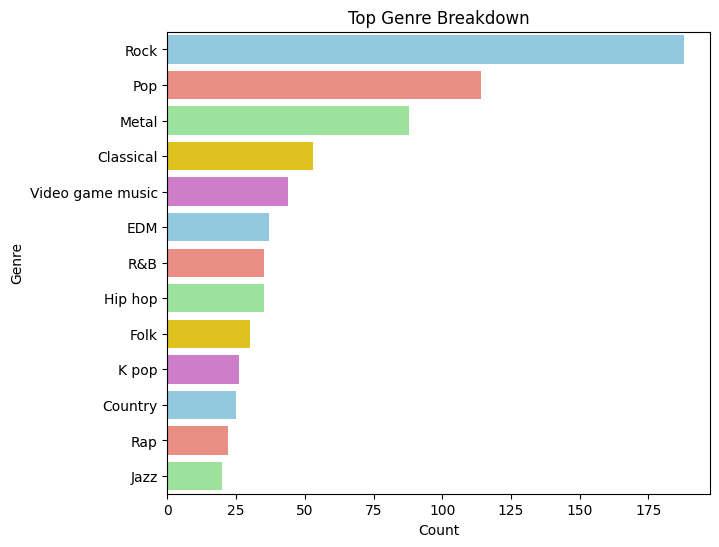

In [27]:
import seaborn as sns

# Filter the top genres with counts greater than 10
genre_counts = df["Fav genre"].value_counts().loc[lambda x: x > 10]

# Create a DataFrame from the filtered genre counts
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Define custom colors
custom_palette = ["skyblue", "salmon", "lightgreen", "gold", "orchid"]

# Plot the side bar plot with the custom color palette
plt.figure(figsize=(7, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts_df, palette=custom_palette)

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top Genre Breakdown")
plt.show()


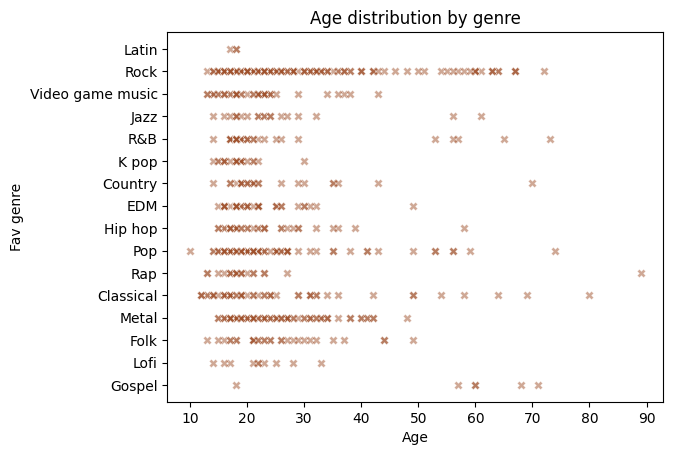

In [28]:
sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');

In [29]:
df.shape

(736, 33)

**MUSIC EFFECT BY FAVOURITE GENRE**

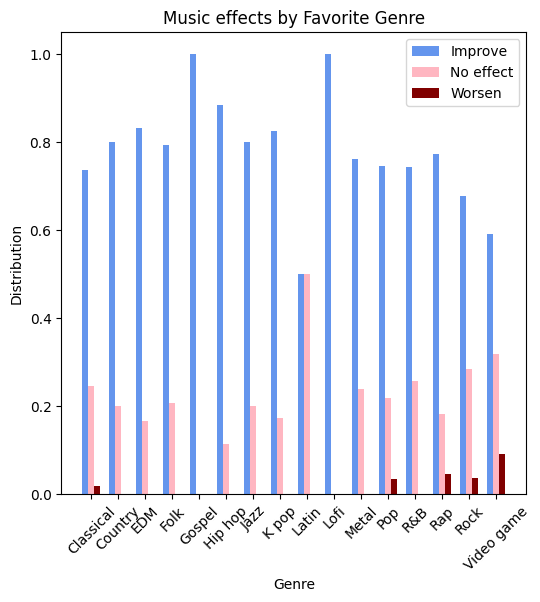

In [30]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(6, 6))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'cornflowerblue')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'lightpink')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'maroon')

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()


<ipython-input-27-10b331701bcd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Fav genre', y='Anxiety', data=filtered_df, palette='muted')


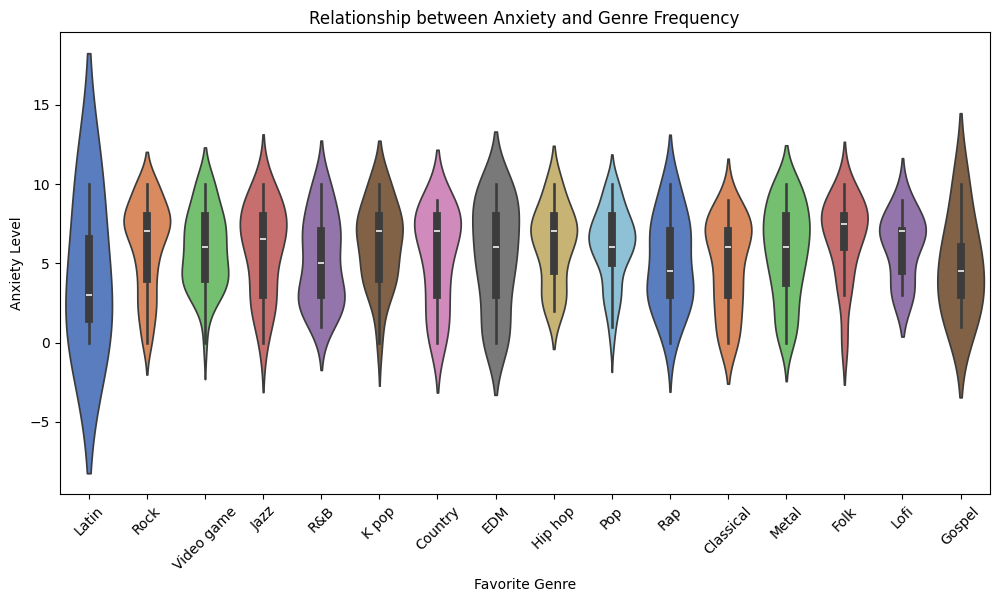

In [27]:
import seaborn as sns

# Filter out rows where Anxiety is not NaN
filtered_df = df.dropna(subset=['Anxiety'])

# Plot a violin plot to show the distribution of Anxiety levels for each genre
plt.figure(figsize=(12, 6))
sns.violinplot(x='Fav genre', y='Anxiety', data=filtered_df, palette='muted')
plt.title('Relationship between Anxiety and Genre Frequency')
plt.xlabel('Favorite Genre')
plt.ylabel('Anxiety Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with a gradient
colors = sns.color_palette("Blues", n_colors=len(genre_anxiety_avg))

# Plot the bar plot with the custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_anxiety_avg.index, y=genre_anxiety_avg.values, palette=colors)
plt.title('Average Anxiety Level by Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Anxiety Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


NameError: name 'genre_anxiety_avg' is not defined

<ipython-input-33-f8fa9e1d57da>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_anxiety_avg.index, y=genre_anxiety_avg.values, palette='muted')


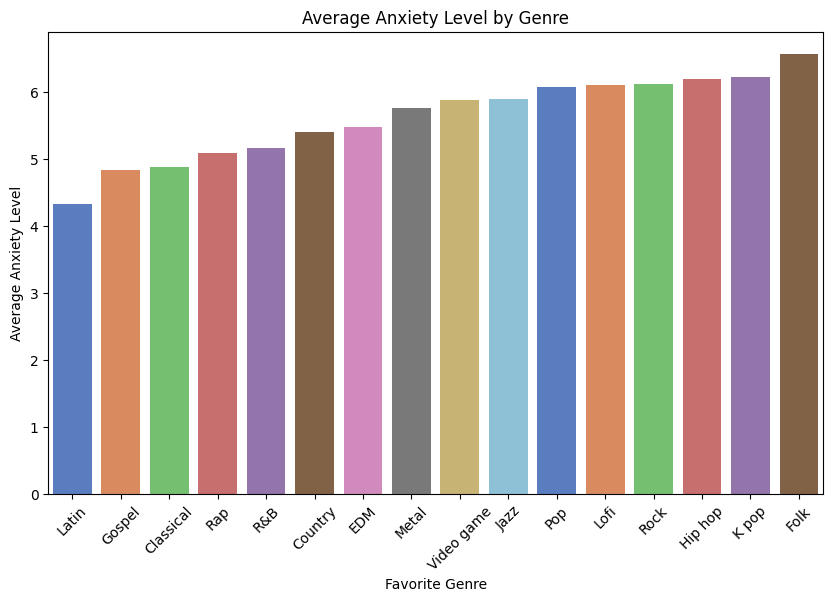

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by genre and calculate the average anxiety level for each genre
genre_anxiety_avg = df.groupby('Fav genre')['Anxiety'].mean().sort_values()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_anxiety_avg.index, y=genre_anxiety_avg.values, palette='muted')
plt.title('Average Anxiety Level by Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Anxiety Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


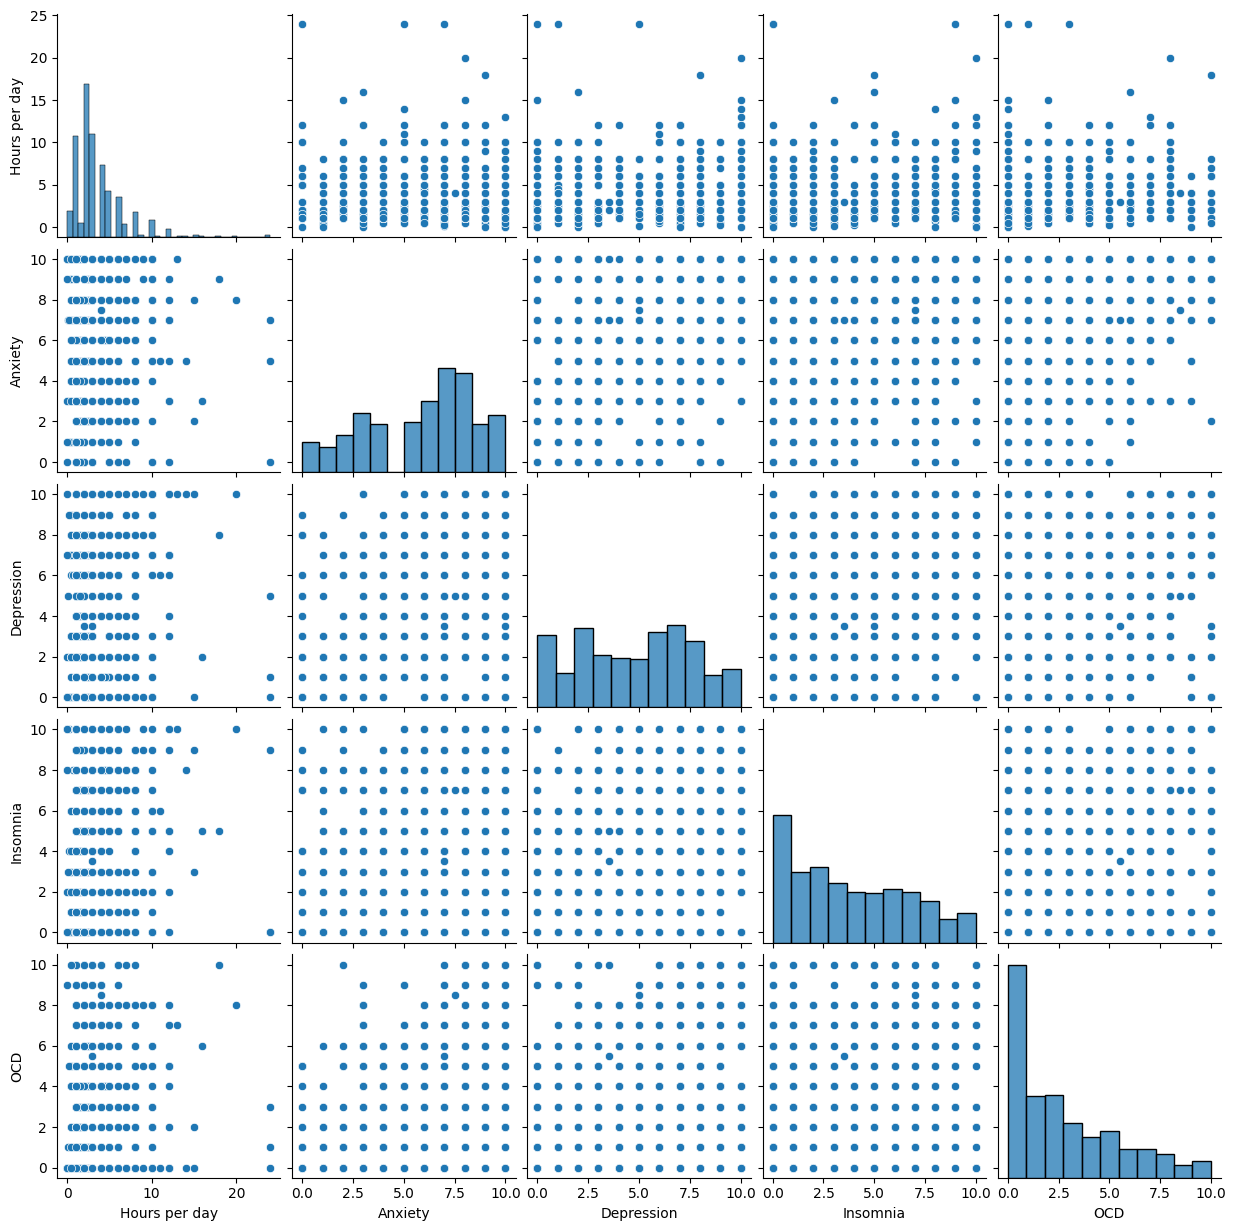

In [34]:
import seaborn as sns

# Replace any NaN values with a placeholder (e.g., 'Unknown') for categorical variables
df_filled = df.fillna('Unknown')

# Select only numerical columns for pairplot
numerical_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns

# Create a pairplot
sns.pairplot(df_filled[numerical_columns])

plt.show()


In [32]:
print(df['Exploratory'].unique())


['Yes' 'No']


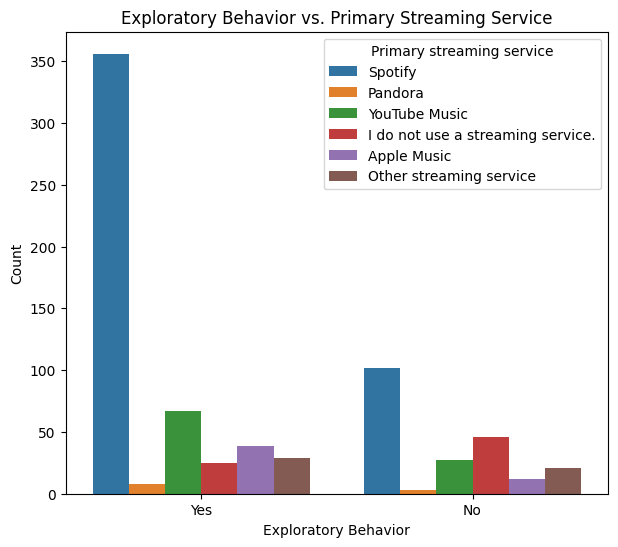

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between exploratory behavior and streaming site preference
plt.figure(figsize=(7, 6))
sns.countplot(x='Exploratory', hue='Primary streaming service', data=df)
plt.title('Exploratory Behavior vs. Primary Streaming Service')
plt.xlabel('Exploratory Behavior')
plt.ylabel('Count')
plt.show()
